# Capstone Two - EDA 

Now that we have cleaned the data to a point that we can work with it, let's take some time to explore the data. To remind us of our goal, we will be determining if there are any correlations between specific characteristics of our bank's cold call marketing campaigns and our prospects saying "yes" to a term deposit with the bank.

We have nearly 20 data points to explore, so let's get to it!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
%matplotlib inline

In [2]:
#Download the csv file and import into dataframe.
url = 'https://raw.githubusercontent.com/GabeGibitz/springboard/master/Capstone/data/bank_clean.csv'
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,4.0,0.0,0.0,telephone,5.0,1.0,261.0,1.0,NaN,0.0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57.0,services,married,12.0,0.0,0.0,telephone,5.0,1.0,149.0,1.0,NaN,0.0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37.0,services,married,12.0,1.0,0.0,telephone,5.0,1.0,226.0,1.0,NaN,0.0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40.0,admin.,married,6.0,0.0,0.0,telephone,5.0,1.0,151.0,1.0,NaN,0.0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56.0,services,married,12.0,0.0,1.0,telephone,5.0,1.0,307.0,1.0,NaN,0.0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0


In [5]:
df['y'].value_counts()


0.0    33983
1.0     4258
Name: y, dtype: int64

In [3]:
df.describe()

,age,education,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,38241.000000,38241.000000,38241.000000,38241.000000,38241.000000,38241.000000,38239.000000,38241.000000,1366.000000,38241.000000,38241.000000,38241.000000,38241.000000,38241.000000,38241.000000,38241.000000
mean,39.860281,11.855103,0.538035,0.155828,6.620198,2.977145,258.195847,2.566434,5.964129,0.170027,0.082898,93.570336,-40.541068,3.623348,5167.433937,0.111346
std,10.289241,3.959378,0.498558,0.362696,2.048814,1.410381,259.744351,2.767345,3.793695,0.487192,1.565944,0.576376,4.623126,1.730216,71.761612,0.314565
min,17.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,9.000000,0.000000,0.000000,5.000000,2.000000,102.000000,1.000000,3.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,12.000000,1.000000,0.000000,6.000000,3.000000,180.000000,2.000000,6.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,16.000000,1.000000,0.000000,8.000000,4.000000,319.000000,3.000000,7.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,16.000000,1.000000,1.000000,12.000000,5.000000,4918.000000,43.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38241 entries, 0 to 38240
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38241 non-null  float64
 1   job             38241 non-null  object 
 2   marital         38241 non-null  object 
 3   education       38241 non-null  float64
 4   housing         38241 non-null  float64
 5   loan            38241 non-null  float64
 6   contact         38241 non-null  object 
 7   month           38241 non-null  float64
 8   day_of_week     38241 non-null  float64
 9   duration        38239 non-null  float64
 10  campaign        38241 non-null  float64
 11  pdays           1366 non-null   float64
 12  previous        38241 non-null  float64
 13  poutcome        5179 non-null   object 
 14  emp.var.rate    38241 non-null  float64
 15  cons.price.idx  38241 non-null  float64
 16  cons.conf.idx   38241 non-null  float64
 17  euribor3m       38241 non-null 

## As a reminder, our column explanations:

Bank client data:

- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes:

- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

- y: has the client subscribed a term deposit? (binary: 'yes','no')

## Suspected Correlations



With a background in marketing, my go-to categories/columns that I think would directly affect the response of a potential client are the following:
- Age
- Education
- Previous
- Loan & Housing
- Previous, Campaign, Duration

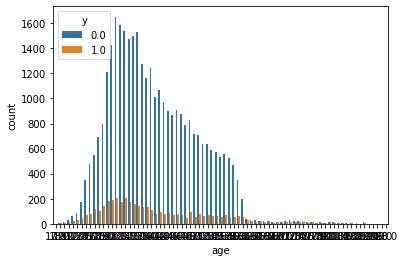

In [5]:
sns.countplot(x='age', data=df, hue='y')

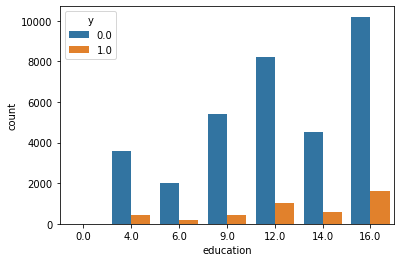

In [6]:
sns.countplot(x='education', data=df, hue='y')

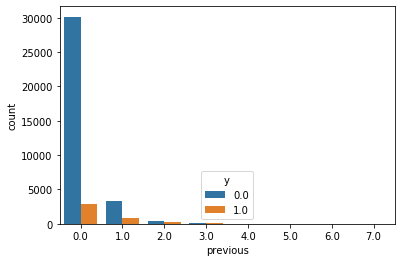

In [7]:
sns.countplot(x='previous', data=df, hue='y')

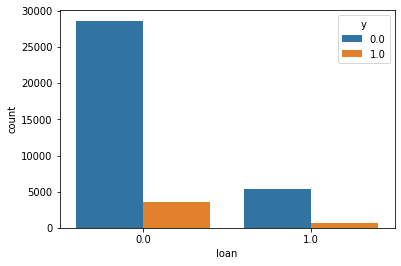

In [8]:
sns.countplot(x='loan', data=df, hue='y')

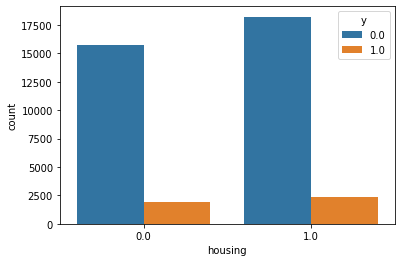

In [9]:
sns.countplot(x='housing', data=df, hue='y')

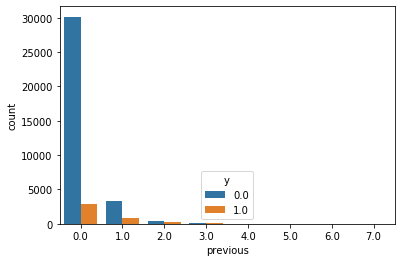

In [10]:
sns.countplot(x='previous', data=df, hue='y')

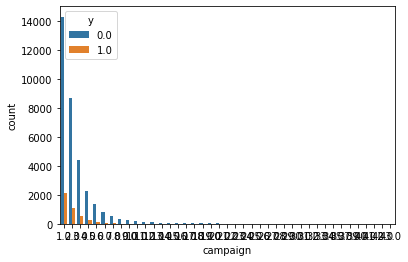

In [11]:
sns.countplot(x='campaign', data=df, hue='y')

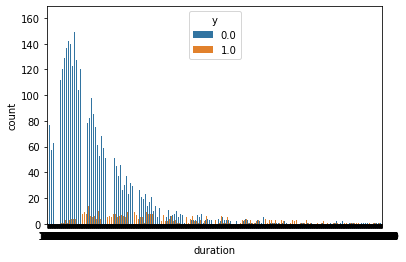

In [12]:
sns.countplot(x='duration', data=df, hue='y')

Some of this data was what I pictured, but other observations were surprising. As suspected, there is a somewhat normal curve associated with the age, for instance. More people in middle age were called, and more naturally said yes, but the proportion seemed to say the same. This happened across multiple factors. 

Take the Seaborn plot of the Loan plot. 

Yes, we had more prospects say yes from the left column, but more were polled. The ratio is roughly the same between the left and the right. Therefore, we must be careful that we don't create too many issues by reading the count of the observations instead of the ratio of "yes" to "no."

Some observations:
- I expected a strong correlation with education. I didn't see any.
- I expected the amount of 'yes' to rise and fall with the duration of the call. However, the 'yes' results held steady as the duration decreased.

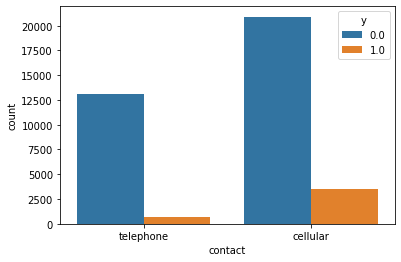

In [13]:
sns.countplot(x='contact', data=df, hue='y')

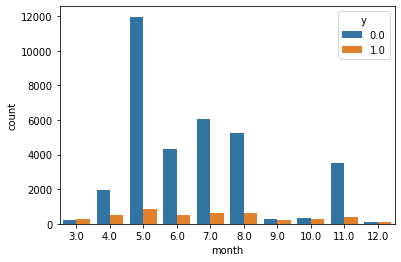

In [14]:
sns.countplot(x='month', data=df, hue='y')

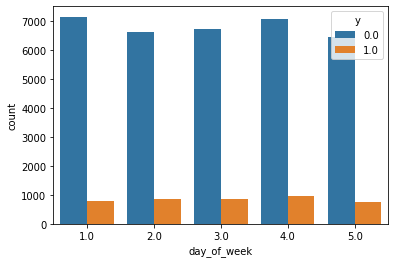

In [15]:
sns.countplot(x='day_of_week', data=df, hue='y')

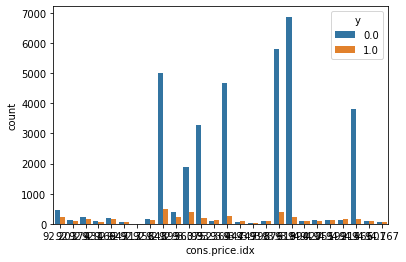

In [16]:
sns.countplot(x='cons.price.idx', data=df, hue='y')

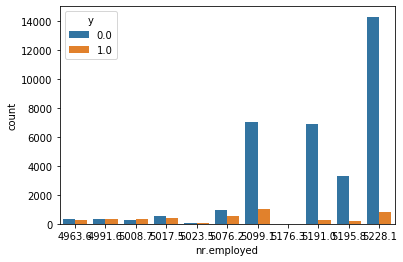

In [17]:
sns.countplot(x='nr.employed', data=df, hue='y')

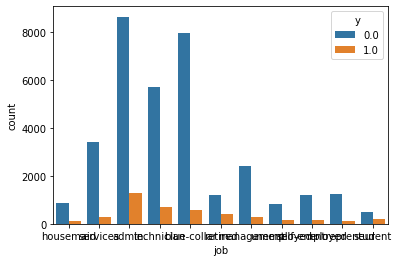

In [18]:
sns.countplot(x='job', data=df, hue='y')

Ironically, some of the values I didn't think mattered seemed to matter more.

For instance:
- Talking on the cell phone seemed to yield better results.
- Something happened in May...why so many calls but so few sales?
- Could be too small
- No correlation with day of the week.


I thought running a pairplot would help, but it didn't. It's tough to extract data from a yes/no column (as seen on the far right column of hte pairplot below. Pairplots work better for a regression model, instead of a classification model like we are using here.

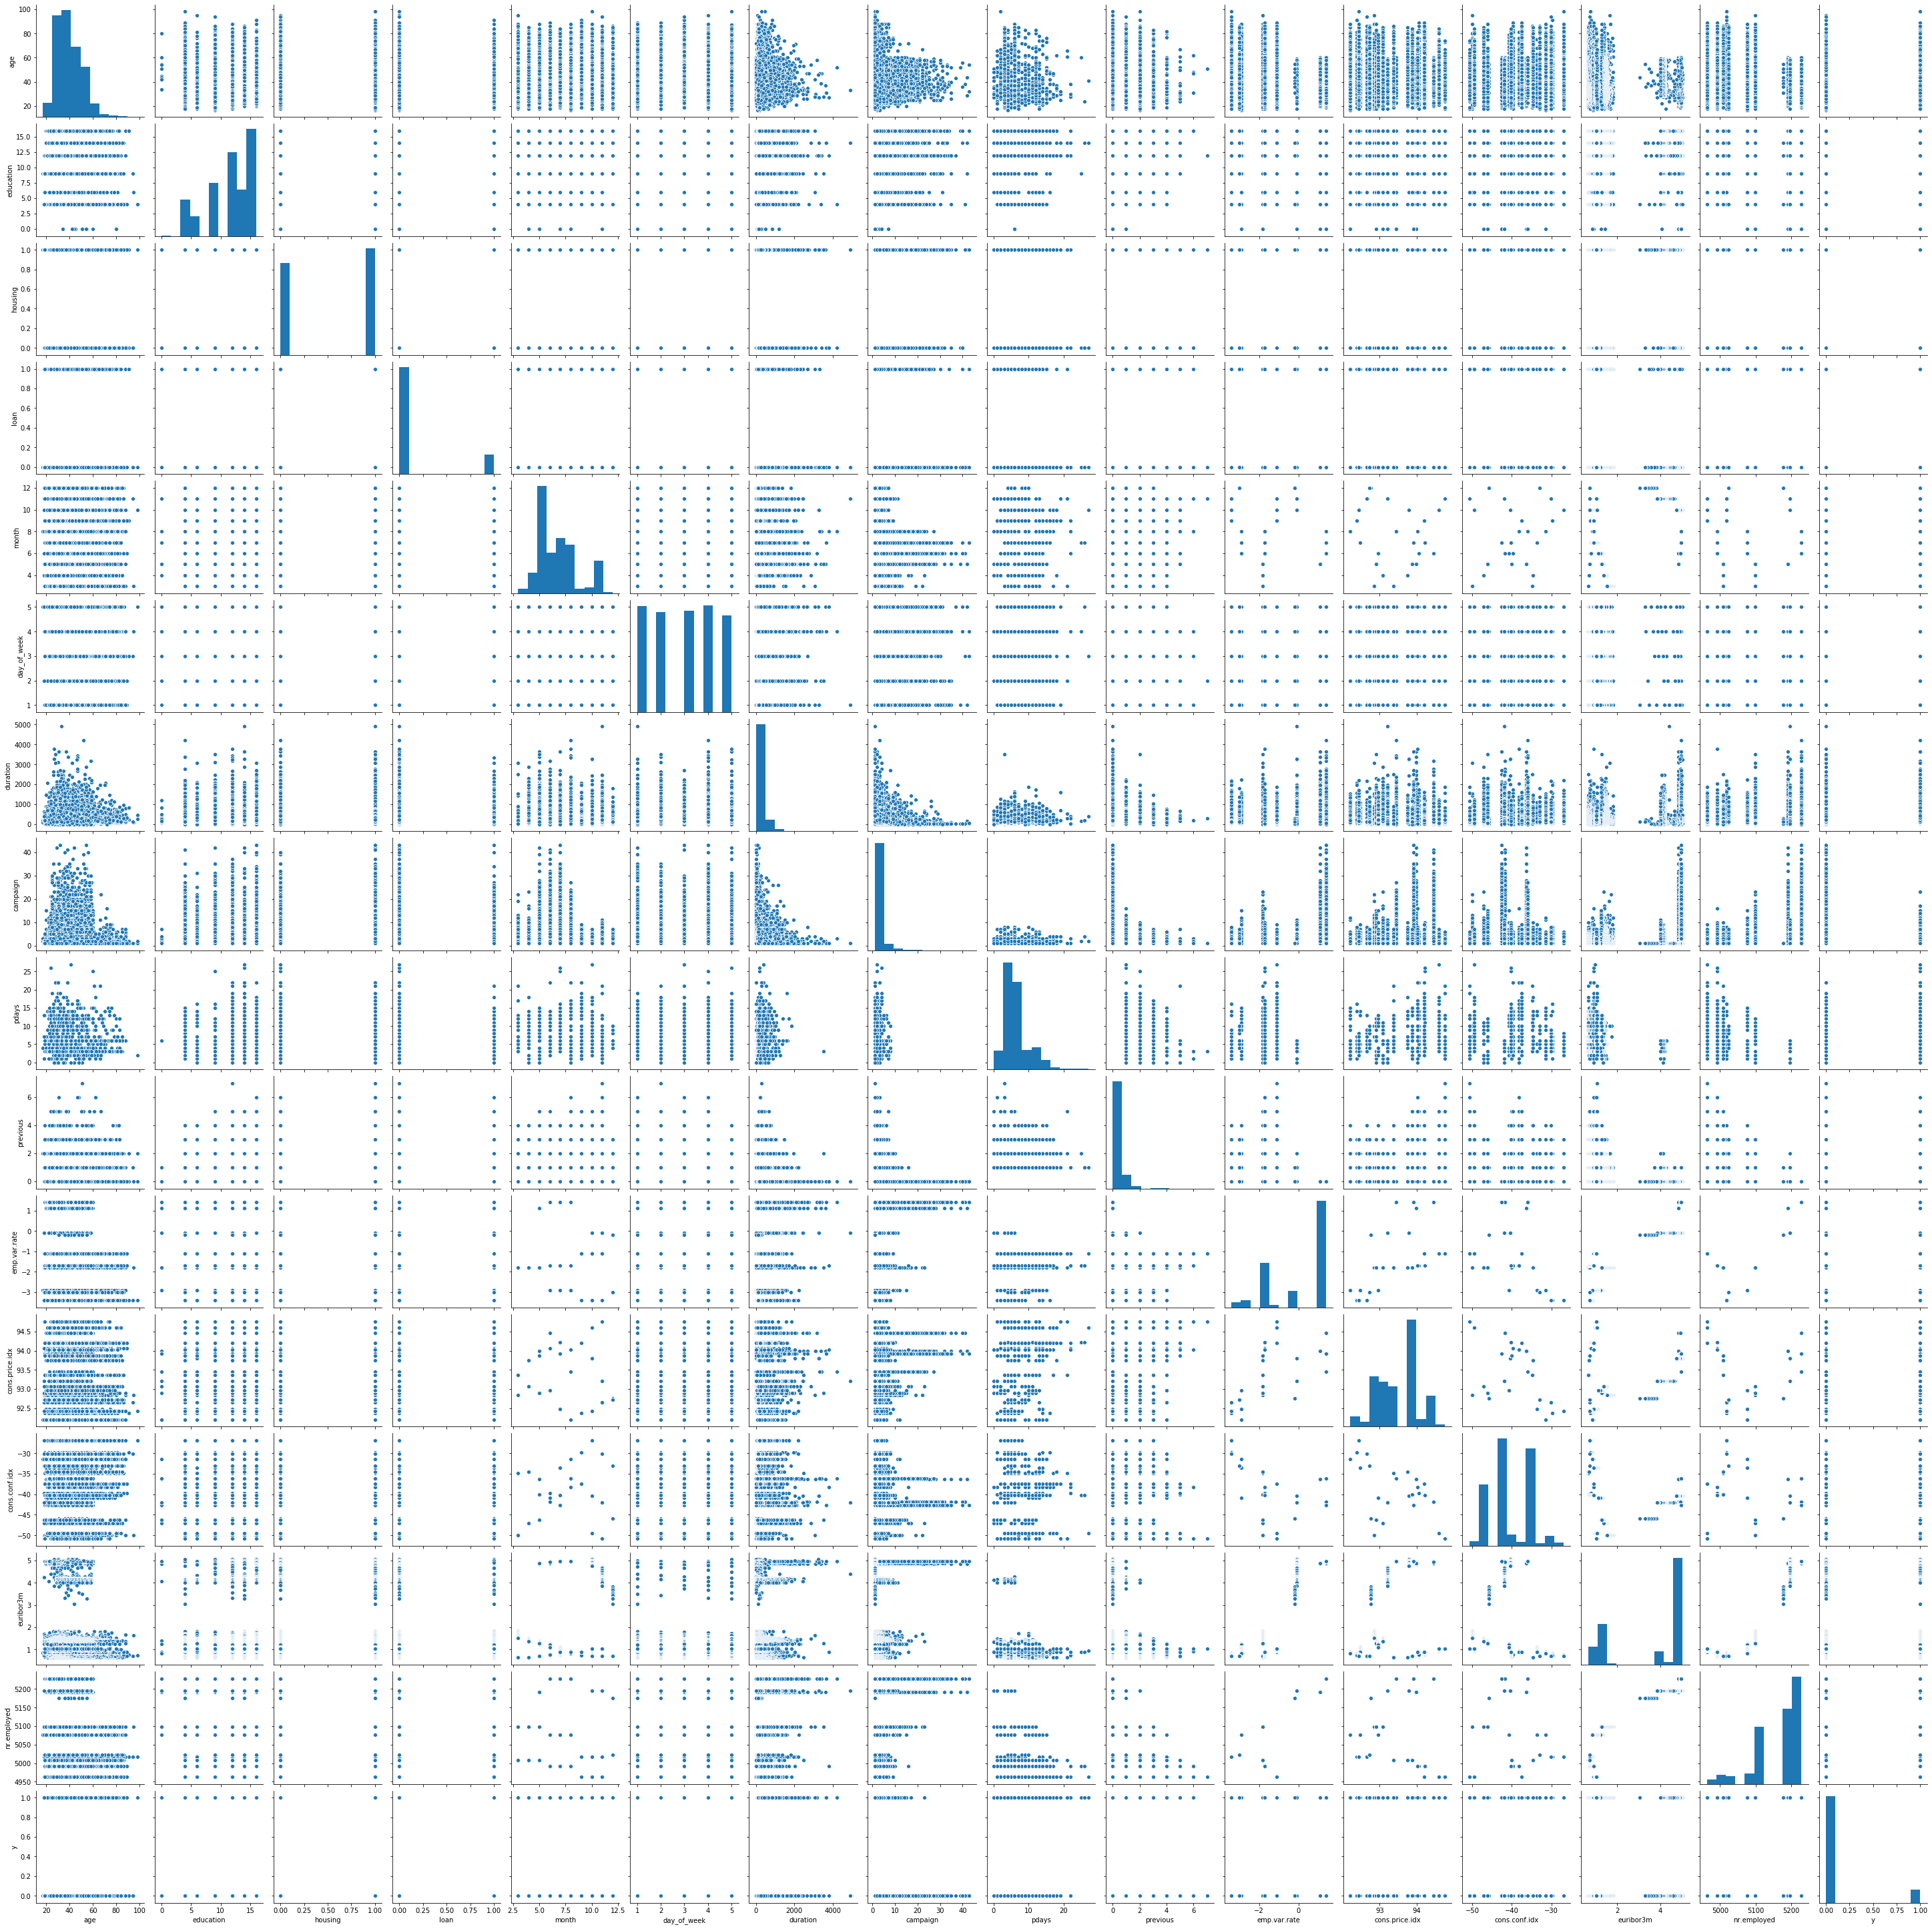

In [19]:
sns.pairplot(df)

At this point, we are wrapping our exploratory data analysis with more insights than originally assumed. This is enough information to take into our next phase, pre-processing and training data development.

See you there!